# sonar.csv
## - 1. 전처리
## - 2. 모델 정의/설정/학습/평가 최소한 3가지 이상
## - 3. 데이터 시각화

In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv('dataset/sonar.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# 1. 데이터 전처리

In [4]:
# 결측치 확인
df.isnull().sum().sum()

0

## 맨 마지막 열의 데이터를 숫자로 바꾸기

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
encoded = encoder.fit_transform(df.iloc[:, -1])

In [7]:
# 잘 바뀌었나 확인
encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
# 바뀐 값을 데이터프레임에 넣기
df[60] = encoded
df.head() # 잘 바뀌었나 확인

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


# 2. 모델 정의/설정/학습/평가

## - 24/12/6/1 layer, 200 epochs ==> 0.8654

In [9]:
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1].values, df.iloc[:,-1].values, stratify=df.iloc[:,-1].values, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((156, 60), (52, 60), (156,), (52,))

In [12]:
model1 = Sequential([
    Dense(24, input_dim=60, activation='relu'),   
    Dense(12, activation='relu'),                
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                1464      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 1,849
Trainable params: 1,849
Non-trainable params: 0
_________________________________________________________________


In [13]:
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam', metrics = ['accuracy']
)

history1 = model1.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200, batch_size=50, verbose=0)

In [14]:
acc1 = model1.evaluate(X_test, y_test)
print(f'model1 정확도:{acc1[1]:.4f}')

2/2 [==============================] - 0s 996us/step - loss: 0.5434 - accuracy: 0.8654
model1 정확도:0.8654


## - minmax 스케일링, 24/12/6/1 layer, 200 epochs ==> 0.8846 ★채택★

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.iloc[:,:-1].values)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.iloc[:,-1].values, stratify=df.iloc[:,-1].values, random_state=2021
)

In [21]:
model2 = Sequential([
    Dense(24, input_dim=60, activation='relu'), 
    Dense(12, activation='relu'),                
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [22]:
model2.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam', metrics = ['accuracy']
)

history2 = model2.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200, batch_size=50, verbose=0)

In [23]:
acc2 = model2.evaluate(X_test, y_test)
print(f'model2 정확도:{acc2[1]:.4f}')

2/2 [==============================] - 0s 1000us/step - loss: 0.4186 - accuracy: 0.8846
model2 정확도:0.8846


## - minmax 스케일링, 36/18/9/1 layer, 200 epochs ==> 0.8654

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.iloc[:,-1].values, stratify=df.iloc[:,-1].values, random_state=2021
)

In [25]:
model3 = Sequential([
    Dense(36, input_dim=60, activation='relu'),               
    Dense(18, activation='relu'),
    Dense(9, activation='relu'),
    Dense(1, activation='sigmoid')
])

model3.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam', metrics = ['accuracy']
)

history3 = model3.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200, batch_size=50, verbose=0)

In [26]:
acc3 = model3.evaluate(X_test, y_test)
print(f'model3 정확도:{acc3[1]:.4f}')

2/2 [==============================] - 0s 500us/step - loss: 0.7192 - accuracy: 0.8462
model3 정확도:0.8462


# 3. 데이터 시각화

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
y_acc = history2.history['accuracy']
y_vloss = history2.history['val_loss']
x_len = np.arange(len(y_acc))

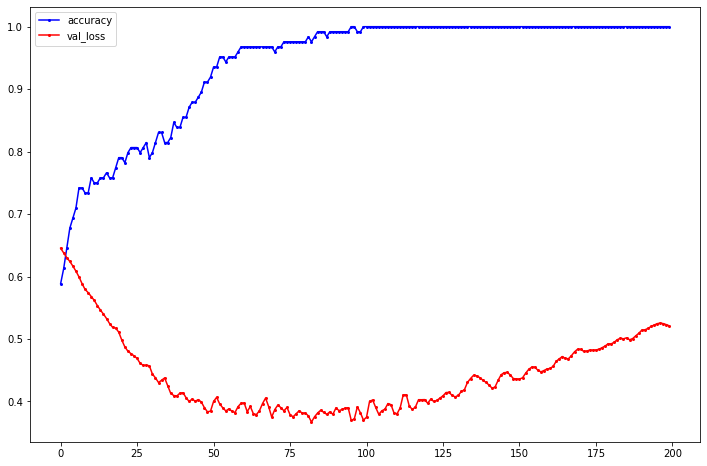

In [57]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()